<h1>Data mining Project</h1>
<p>Réalisé par : Ayoub Laarouchi</p>
<p>Study on los angeles crime data set from the official lacity data website</p>

In [58]:
# The website for the data https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

<p>This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy.</p>

<h2>Imports</h2>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import numpy as np
from leven import levenshtein       
from sklearn.cluster import dbscan
from pprint import pprint
pd.options.display.max_columns = None
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

<h2>Data Info</h2>
<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
      <th>Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Division_Record_Number</td>
      <td>Official file number made up of a 2 digit year, area ID, and 5 digits</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Reported_Date</td>
      <td>MM/DD/YYYY</td>
      <td>Date & Time</td>
    </tr>
    <tr>
      <td>Occurred_Date</td>
      <td>MM/DD/YYYY</td>
      <td>Date & Time</td>
    </tr>
    <tr>
      <td>Occurred_Time</td>
      <td>In 24 hour military time.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Area_ID</td>
      <td>The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Area_Name</td>
      <td>The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Report_District_Number</td>
      <td>A four-digit code that represents a sub-area within a Geographic Area.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Part_Type</td>
      <td>1 for serious crime , 2 for Less Serious Crime</td>
      <td></td>
    </tr>
    <tr>
      <td>Crime_Code</td>
      <td>Indicates the crime committed. (Same as Primary_Crime_Code)</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Primary_Crime_Code</td>
      <td>Defines the Crime Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Modus_Operandi</td>
      <td>Modus Operandi: Activities associated with the suspect in commission of the crime.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Age</td>
      <td>Two character numeric</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Sex</td>
      <td>F - Female M - Male X - Unknown</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Descent</td>
      <td>A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Premise_Code</td>
      <td>The type of structure, vehicle, or location where the crime took place.</td>
      <td>Number</td>
    </tr>
    <tr>
      <td>Premise_Description</td>
      <td>Defines the Premise Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Weapon_Used_Code</td>
      <td>The type of weapon used in the crime.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Weapon_Description</td>
      <td>Defines the Weapon Used Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Case_Status</td>
      <td>Status of the case. (IC is the default)</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Status_Description</td>
      <td>Defines the Status Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Primary_Crime_Code</td>
      <td>Indicates the primary and most serious crime committed.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_1</td>
      <td>May contain a code for an additional crime, less serious than Primary_Crime_Code.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_2</td>
      <td>May contain a code for an additional crime, less serious than Primary_Crime_Code.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_3</td>
      <td>May contain a code for an additional crime, less serious than Primary_Crime_Code.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Location</td>
      <td>Street address of crime incident rounded to the nearest hundred block to maintain anonymity.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Cross_Street</td>
      <td>Cross Street of rounded Address</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Latitude</td>
      <td>Latitude</td>
      <td>Number</td>
    </tr>
    <tr>
      <td>Longitude</td>
      <td>Longitude</td>
      <td>Number</td>
    </tr>
  </tbody>
</table>


In [75]:
data  = pd.read_csv("data1.csv")
data.columns =  ['Division_Record_Number' , 'Reported_Date', 'Occurred_Date', 'Occurred_Time', 'Area_ID', 'Area_Name', 'Report_District',
              'Part_Type', 'Crime_Code', 'Primary_Crime_Code_Description', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex',
              'Victim_Descent', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description',
              'Case_Status', 'Status_Description', 'Primary_Crime_Code', 'Secondary_Crime_Code_1',
              'Secondary_Crime_Code_2', 'Secondary_Crime_Code_3', 'Location', 'Cross_Street', 'Latitude', 'Longitude']
data = data.set_index(["Division_Record_Number"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910707 entries, 190326475 to 240104953
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Reported_Date                   910707 non-null  object 
 1   Occurred_Date                   910707 non-null  object 
 2   Occurred_Time                   910707 non-null  int64  
 3   Area_ID                         910707 non-null  int64  
 4   Area_Name                       910707 non-null  object 
 5   Report_District                 910707 non-null  int64  
 6   Part_Type                       910707 non-null  int64  
 7   Crime_Code                      910707 non-null  int64  
 8   Primary_Crime_Code_Description  910707 non-null  object 
 9   Modus_Operandi                  783696 non-null  object 
 10  Victim_Age                      910707 non-null  int64  
 11  Victim_Sex                      789672 non-null  object 
 12  Victim_Des

In [76]:
data.head(5)

,Reported_Date,Occurred_Date,Occurred_Time,Area_ID,Area_Name,Report_District,Part_Type,Crime_Code,Primary_Crime_Code_Description,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Case_Status,Status_Description,Primary_Crime_Code,Secondary_Crime_Code_1,Secondary_Crime_Code_2,Secondary_Crime_Code_3,Location,Cross_Street,Latitude,Longitude
Division_Record_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


<h2>Data Preparation</h2>

[]

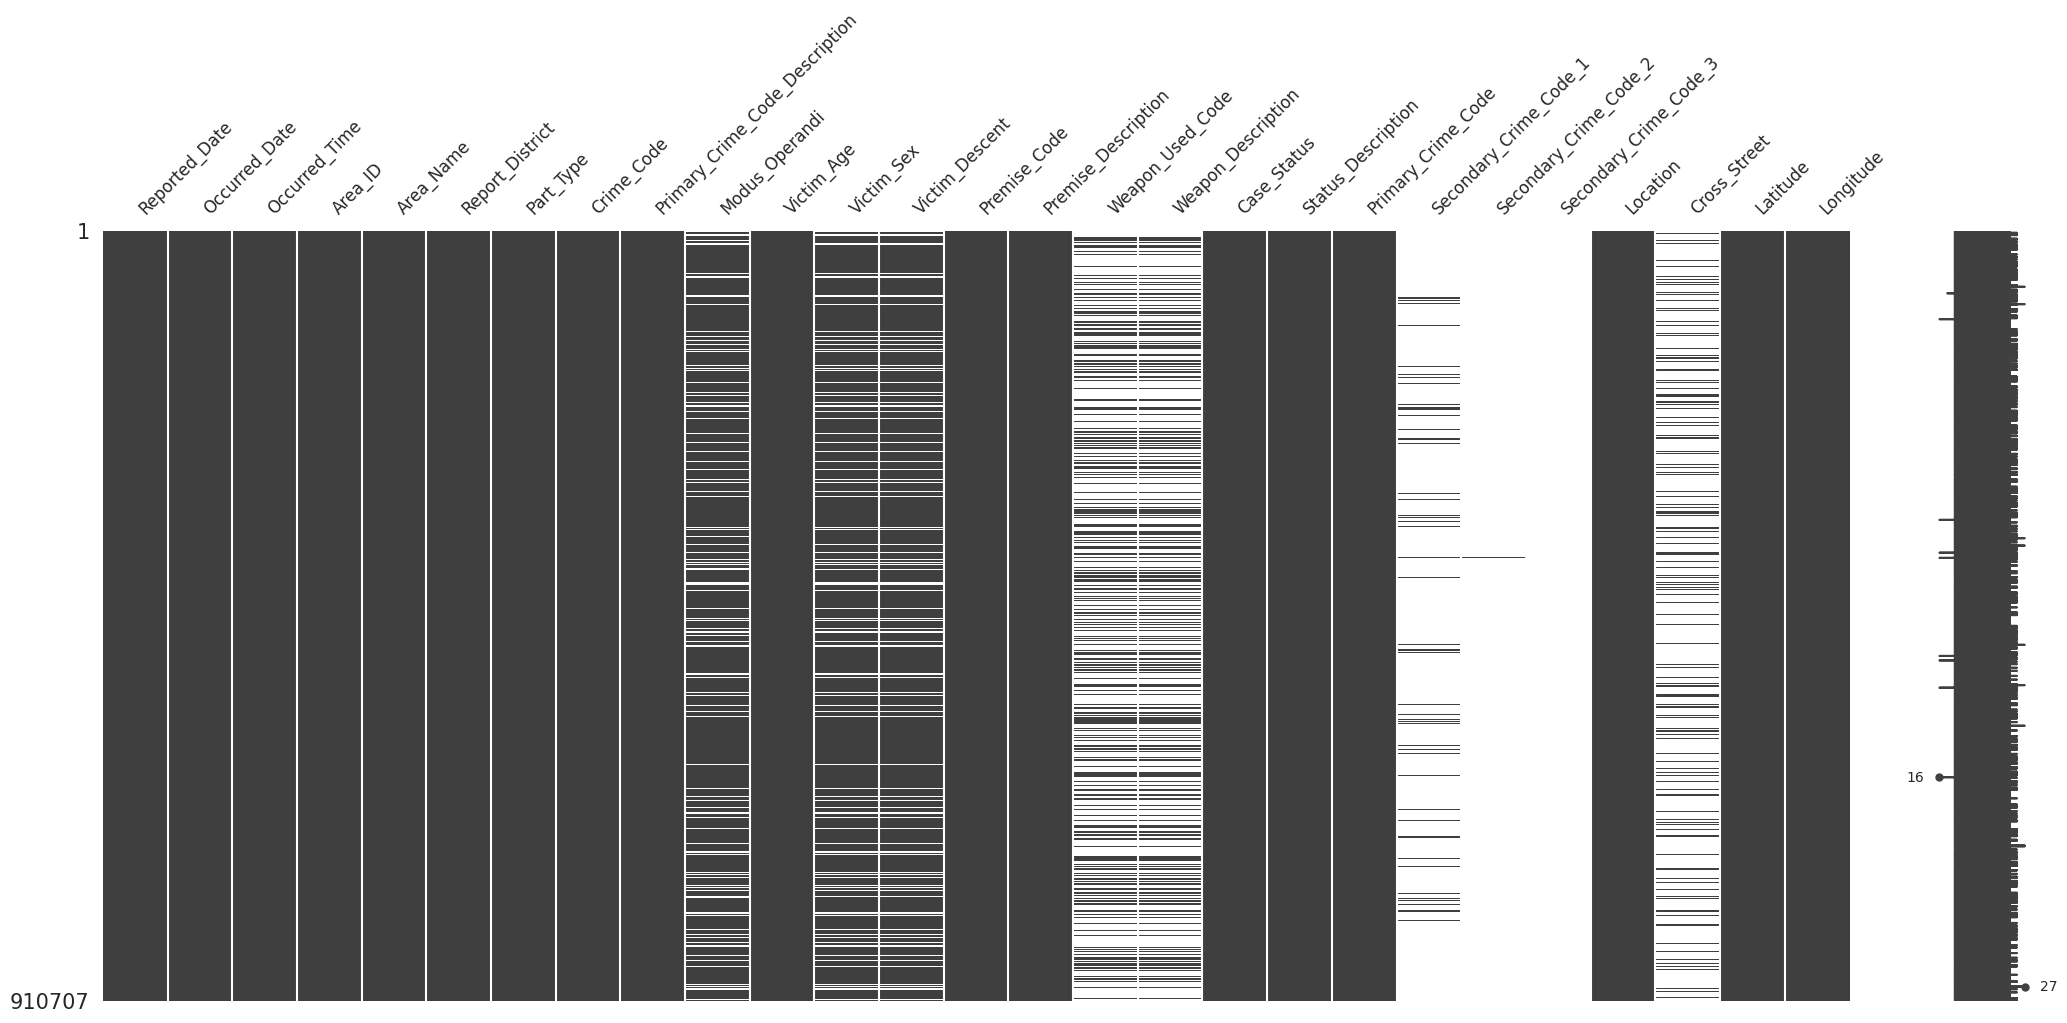

In [77]:
missingno.matrix(data,fontsize=12)
plt.plot()

In [78]:
data.describe()

,Occurred_Time,Area_ID,Report_District,Part_Type,Crime_Code,Victim_Age,Premise_Code,Weapon_Used_Code,Primary_Crime_Code,Secondary_Crime_Code_1,Secondary_Crime_Code_2,Secondary_Crime_Code_3,Latitude,Longitude
count,910707.000000,910707.000000,910707.000000,910707.000000,910707.000000,910707.000000,910697.000000,315247.000000,910696.000000,66335.000000,2237.000000,64.00000,910707.000000,910707.000000
mean,1337.042061,10.698686,1116.307327,1.410830,500.809825,29.588992,306.502891,363.475262,500.552370,957.968222,983.913724,991.21875,33.989025,-118.059907
std,652.903148,6.102210,610.237433,0.491985,207.606033,21.851962,217.329569,123.700805,207.397779,110.627785,52.032905,27.06985,1.700407,5.894676
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.429600
50%,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058600,-118.321600
75%,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.163400,-118.273900
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


<h3>Area_ID & Area_Name</h3>
<p>These two columns provide the same information, therefore we can remove one without any information loss.</p>

In [79]:
result = data[["Area_ID","Area_Name"]].drop_duplicates().sort_values(by=["Area_ID"])
result

,Area_ID,Area_Name
Division_Record_Number,,
200106753,1,Central
230204214,2,Rampart
200320258,3,Southwest
200412582,4,Hollenbeck
220508440,5,Harbor
220614831,6,Hollywood
190326475,7,Wilshire
230808643,8,West LA
200907217,9,Van Nuys


<p>I chose to keep the Area code for less memory consumption, with a dictonnary to convert into the Area_Name.</p>

In [80]:
area_id_to_name = dict(zip(result["Area_ID"],result["Area_Name"]))
data = data.drop("Area_Name",axis=1)
pprint(area_id_to_name)

{1: 'Central',
 2: 'Rampart',
 3: 'Southwest',
 4: 'Hollenbeck',
 5: 'Harbor',
 6: 'Hollywood',
 7: 'Wilshire',
 8: 'West LA',
 9: 'Van Nuys',
 10: 'West Valley',
 11: 'Northeast',
 12: '77th Street',
 13: 'Newton',
 14: 'Pacific',
 15: 'N Hollywood',
 16: 'Foothill',
 17: 'Devonshire',
 18: 'Southeast',
 19: 'Mission',
 20: 'Olympic',
 21: 'Topanga'}


<h3>Crime codes</h3>

<p>The dataset has five columns pertaining to the crimes committed.</p> 
<ul>
    <li>Crime_Code : Indicates the crime committed. (Same as Primary_Crime_Code) </li> 
    <li>Primary_Crime_Code : Indicates the primary and most serious crime committed</li> 
    <li>Secondary_Crime_Code_1 : May contain a code for an additional crime, less serious than Primary_Crime_Code</li> 
    <li>Secondary_Crime_Code_2 : May contain a code for an additional crime, less serious than Primary_Crime_Code</li> 
    <li>Secondary_Crime_Code_3 : May contain a code for an additional crime, less serious than Primary_Crime_Code</li>
</ul>
<p>From the meta-data provided we are told that Crime_Code and Primary_Crime_Code should be equal, which is not the case as shown in what follows.</p>

In [81]:
columns = ["Primary_Crime_Code", "Secondary_Crime_Code_1", "Secondary_Crime_Code_2", "Secondary_Crime_Code_3" ]
equal_values = {}
for col in columns:
    equal_values[col] = data.loc[data[col] == data[col]].shape[0]
print("How many values equal Crime code for each column :")
pprint(equal_values)

How many values equal Crime code for each column :
{'Primary_Crime_Code': 910696,
 'Secondary_Crime_Code_1': 66335,
 'Secondary_Crime_Code_2': 2237,
 'Secondary_Crime_Code_3': 64}


<p>We remark that there are some values of Secondary_Crime_Code_1 and Secondary_Crime_Code_2 which are equal to Crime_Code. I assume that these are incorrect inputs from the reporting officers, and that these values should be swapped with the ones in the Primary_Crime_Code column.</p>

In [82]:
modified_Secondary_Crime_Code_1 = data.apply(lambda row : row["Primary_Crime_Code"] if row["Crime_Code"] == row["Secondary_Crime_Code_1"] else row["Secondary_Crime_Code_1"],axis=1) 
modified_Secondary_Crime_Code_2 = data.apply(lambda row : row["Primary_Crime_Code"] if row["Crime_Code"] == row["Secondary_Crime_Code_2"] else row["Secondary_Crime_Code_2"],axis=1) 
data["Secondary_Crime_Code_1"] = modified_Secondary_Crime_Code_1
data["Secondary_Crime_Code_2"] = modified_Secondary_Crime_Code_2
data["Primary_Crime_Code"] = data["Crime_Code"]

<p>After swapping the values, we check again and we have solved the issue.</p>

In [83]:
columns = ["Primary_Crime_Code", "Secondary_Crime_Code_1", "Secondary_Crime_Code_2", "Secondary_Crime_Code_3" ]
equal_values = {}
for i in range(len(columns)):
    equal_values[columns[i]] = data.loc[data[columns[i]] == data["Crime_Code"]].shape[0]
pprint(equal_values)

{'Primary_Crime_Code': 910707,
 'Secondary_Crime_Code_1': 0,
 'Secondary_Crime_Code_2': 0,
 'Secondary_Crime_Code_3': 0}


<p>we then drop the Crime_Code column, and make all of the crime codes types as string.</p>

In [84]:
data.drop("Crime_Code",inplace=True, axis=1)
columns = ["Primary_Crime_Code", "Secondary_Crime_Code_1", "Secondary_Crime_Code_2", "Secondary_Crime_Code_3" ]
data[columns] = data[columns].astype("float").astype("string")
data[columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 910707 entries, 190326475 to 240104953
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Primary_Crime_Code      910707 non-null  string
 1   Secondary_Crime_Code_1  66324 non-null   string
 2   Secondary_Crime_Code_2  2237 non-null    string
 3   Secondary_Crime_Code_3  64 non-null      string
dtypes: string(4)
memory usage: 34.7 MB


<p>Now to check the values of these columns.</p>

In [85]:
unique_df = data[["Primary_Crime_Code","Primary_Crime_Code_Description"]].drop_duplicates()
unique_df.isna().any().any()

False

<p>We choose to keep only a dictonnary for conversion from Crime code to Crime description, for sake of memory usage, and we drop the Primary_Crime_Code_Description column.</p>

In [86]:
primary_crime_to_description = dict(zip(unique_df["Primary_Crime_Code"],unique_df["Primary_Crime_Code_Description"]))
data.drop("Primary_Crime_Code_Description",axis=1,inplace=True)

<p>For all the values in the primary code column we have their corresponding description.</p>
<p>For the secondary crime codes most of them exist also as primary codes, therefore we can get their corresponding descriptions, but for those that don't exist as primary codes we don't have a description, and for now we have no way to find one.</p>

In [87]:
Primary_Crime_Code_unique_values = data["Primary_Crime_Code"].unique()
columns = ["Secondary_Crime_Code_1", "Secondary_Crime_Code_2", "Secondary_Crime_Code_3"]
results = {}
for column in columns:
    unique_values = data[column].dropna().unique()
    common_values = []
    uncommon_values = []
    for value in unique_values:
         if value in Primary_Crime_Code_unique_values:
              common_values.append(value)
         else: uncommon_values.append(value)
    results[column] = { "common" : len(common_values),"uncommon" : len(uncommon_values)}
pprint(results)

{'Secondary_Crime_Code_1': {'common': 111, 'uncommon': 18},
 'Secondary_Crime_Code_2': {'common': 36, 'uncommon': 5},
 'Secondary_Crime_Code_3': {'common': 4, 'uncommon': 2}}


<h3>Part type</h3>
<p>Part type has either a value of 1 for serious crimes, or 2 for less serious crimes. We verify and find it to be the case.</p>

In [88]:
data["Part_Type"].unique().tolist()

[1, 2]

<h3>Date & Time Formatting</h3>

<p>Our dataset has two columns of type date :</p>
<ul>
    <li>Reported_Date : The date the report was filed by the officer.</li>
    <li>Occurred_Date : The date the crime was committed.</li>
</ul>
<p>We are only interested in the day month and year since the time for all the values is fixed at 12:00:00 AM.</p>

In [89]:
data[["Reported_Date","Occurred_Date"]].head(5)

,Reported_Date,Occurred_Date
Division_Record_Number,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM


In [90]:
data["Reported_Date"].apply(lambda x : x[-11:]).unique()

array(['12:00:00 AM'], dtype=object)

In [91]:
data["Occurred_Date"].apply(lambda x : x[-11:]).unique()

array(['12:00:00 AM'], dtype=object)

In [92]:
data["Reported_Date"] = pd.to_datetime(data["Reported_Date"].apply(lambda date : date[:10]),format="%m/%d/%Y")
data["Occurred_Date"] = pd.to_datetime(data["Occurred_Date"].apply(lambda date : date[:10]),format="%m/%d/%Y")
data[["Reported_Date","Occurred_Date"]]

,Reported_Date,Occurred_Date
Division_Record_Number,,
190326475,2020-03-01,2020-03-01
200106753,2020-02-09,2020-02-08
200320258,2020-11-11,2020-11-04
200907217,2023-05-10,2020-03-10
220614831,2022-08-18,2020-08-17
...,...,...
242106032,2024-02-20,2024-02-17
241604246,2024-01-08,2024-01-08
242004546,2024-01-16,2024-01-16


<p>We verify that the occurence date is always before the report date.</p>

In [93]:
data.loc[data["Reported_Date"] < data["Occurred_Date"]].empty

True

<p>For data visualisation we add a couple of columns.</p>

In [94]:
data["Occurred_Day"] = data["Occurred_Date"].dt.day_name()
data["Occurred_Month"] = data["Occurred_Date"].dt.month_name()
data["Occurred_Trimester"] = (data["Occurred_Date"].dt.month - 1) // 3 + 1
data["Occurred_Year"] = data["Occurred_Date"].dt.year
data["Occurence_Report_Difference"] = (data["Reported_Date"]-data["Occurred_Date"]).dt.days
columns = ["Occurred_Date","Reported_Date","Occurence_Report_Difference","Occurred_Day","Occurred_Month","Occurred_Trimester","Occurred_Year"]
data[columns]

,Occurred_Date,Reported_Date,Occurence_Report_Difference,Occurred_Day,Occurred_Month,Occurred_Trimester,Occurred_Year
Division_Record_Number,,,,,,,
190326475,2020-03-01,2020-03-01,0,Sunday,March,1,2020
200106753,2020-02-08,2020-02-09,1,Saturday,February,1,2020
200320258,2020-11-04,2020-11-11,7,Wednesday,November,4,2020
200907217,2020-03-10,2023-05-10,1156,Tuesday,March,1,2020
220614831,2020-08-17,2022-08-18,731,Monday,August,3,2020
...,...,...,...,...,...,...,...
242106032,2024-02-17,2024-02-20,3,Saturday,February,1,2024
241604246,2024-01-08,2024-01-08,0,Monday,January,1,2024
242004546,2024-01-16,2024-01-16,0,Tuesday,January,1,2024


<p>Our dataset also has a column for time of occurrence:</p>
<ul>
    <li>Occurred_Time</li>
</ul>
<p>We will extract from this column the hour of occurrence.</p>

In [95]:
data["Occurred_Time"] = data["Occurred_Time"].astype("string").str.zfill(4)
data["Occurred_Hour"] =data["Occurred_Time"].str.slice(0,2)
columns = ["Occurred_Date","Reported_Date","Occurence_Report_Difference","Occurred_Day","Occurred_Month","Occurred_Trimester","Occurred_Year","Occurred_Time","Occurred_Hour"]
data[columns]

,Occurred_Date,Reported_Date,Occurence_Report_Difference,Occurred_Day,Occurred_Month,Occurred_Trimester,Occurred_Year,Occurred_Time,Occurred_Hour
Division_Record_Number,,,,,,,,,
190326475,2020-03-01,2020-03-01,0,Sunday,March,1,2020,2130,21
200106753,2020-02-08,2020-02-09,1,Saturday,February,1,2020,1800,18
200320258,2020-11-04,2020-11-11,7,Wednesday,November,4,2020,1700,17
200907217,2020-03-10,2023-05-10,1156,Tuesday,March,1,2020,2037,20
220614831,2020-08-17,2022-08-18,731,Monday,August,3,2020,1200,12
...,...,...,...,...,...,...,...,...,...
242106032,2024-02-17,2024-02-20,3,Saturday,February,1,2024,2330,23
241604246,2024-01-08,2024-01-08,0,Monday,January,1,2024,0800,08
242004546,2024-01-16,2024-01-16,0,Tuesday,January,1,2024,1510,15


In [96]:
data[["Occurred_Date","Reported_Date"]].describe()

,Occurred_Date,Reported_Date
count,910707,910707
mean,2022-02-23 09:23:03.686740736,2022-03-06 12:22:31.869262336
min,2020-01-01 00:00:00,2020-01-01 00:00:00
25%,2021-02-21 00:00:00,2021-03-07 00:00:00
50%,2022-03-16 00:00:00,2022-03-29 00:00:00
75%,2023-03-01 00:00:00,2023-03-13 00:00:00
max,2024-03-04 00:00:00,2024-03-04 00:00:00


<h3>Modus Operandi</h3>
<p>This column provides a list of activities associated with the suspect in commission of the crime.</p>

In [97]:
data["Modus_Operandi"].dropna()

Division_Record_Number
200106753                   1822 1402 0344
200320258                        0344 1251
200907217                        0325 1501
220614831              1822 1501 0930 2004
231808869              1822 0100 0930 0929
                         ...              
241604405              0400 1822 1310 0416
242106032                             0385
241604246                        0356 0919
242004546    2047 0400 0429 0444 1202 1822
240104953                   0329 0400 0416
Name: Modus_Operandi, Length: 783696, dtype: object

<h3>Victim age and sex and descent</h3>

<p>Our dataset has three columns which provide info about the victim of the crime :</p>
<ul>
    <li>Victim_Age : the victim's age</li>
    <li>Victim_Sex : the victim's sex, F - Female M - Male X - Unknown</li>
    <li>Victim_Descent : the victim's ethnicity , A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian</li>
</ul>
<p>For the Victim's age we observe that there are some negative values, since they represent a small sample of the dataset we choose to remove them.</p>

In [98]:
data["Victim_Age"].describe()

count    910707.000000
mean         29.588992
std          21.851962
min          -4.000000
25%           0.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Victim_Age, dtype: float64

<p>for the reports where the victim's age is negative we will set their values to 0, as a default of unknown age</p>

In [99]:
data.loc[data["Victim_Age"] < 0]

,Reported_Date,Occurred_Date,Occurred_Time,Area_ID,Report_District,Part_Type,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Case_Status,Status_Description,Primary_Crime_Code,Secondary_Crime_Code_1,Secondary_Crime_Code_2,Secondary_Crime_Code_3,Location,Cross_Street,Latitude,Longitude,Occurred_Day,Occurred_Month,Occurred_Trimester,Occurred_Year,Occurence_Report_Difference,Occurred_Hour
Division_Record_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230610629,2023-06-02,2020-05-31,0430,6,645,1,1822 1607 0216 0344,-2,X,X,203.0,OTHER BUSINESS,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,310.0,<NA>,<NA>,<NA>,1700 ORCHID AV,NaN,34.1030,-118.3402,Sunday,May,2,2020,1097,04
231806653,2022-06-12,2020-03-04,0800,18,1832,2,0913 0935,-2,X,X,726.0,POLICE FACILITY,NaN,NaN,IC,Invest Cont,946.0,<NA>,<NA>,<NA>,100 W 108TH ST,NaN,33.9401,-118.2761,Wednesday,March,1,2020,830,08
231412171,2023-06-09,2020-06-01,1200,14,1435,2,0443,-2,M,W,501.0,SINGLE FAMILY DWELLING,511.0,VERBAL THREAT,IC,Invest Cont,930.0,<NA>,<NA>,<NA>,3500 GRAND VIEW BL,NaN,34.0118,-118.4365,Monday,June,2,2020,1103,12
222106102,2022-02-25,2020-12-13,1430,21,2156,2,1822 0377,-1,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,354.0,<NA>,<NA>,<NA>,6600 TOPANGA CANYON BL,NaN,34.1904,-118.6059,Sunday,December,4,2020,439,14
221404829,2022-01-18,2020-07-16,0300,14,1487,1,0344,-1,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,310.0,<NA>,<NA>,<NA>,8600 S SEPULVEDA BL,NaN,33.9598,-118.3962,Thursday,July,3,2020,551,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231107124,2023-03-24,2022-01-01,1200,11,1102,2,1501 0100 1822 0930,-1,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,354.0,<NA>,<NA>,<NA>,4200 VERDANT ST,NaN,34.1315,-118.2657,Saturday,January,1,2022,447,12
241705325,2024-02-01,2022-01-01,1200,17,1761,1,0344 1607,-2,X,X,702.0,OFFICE BUILDING/OFFICE,NaN,NaN,IC,Invest Cont,310.0,<NA>,<NA>,<NA>,21800 NORDHOFF ST,NaN,34.2448,-118.6134,Saturday,January,1,2022,761,12
230617256,2023-10-31,2022-02-01,0001,6,643,2,0913 0701 0344,-1,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,662.0,<NA>,<NA>,<NA>,7200 FRANKLIN AV,NaN,34.1037,-118.3459,Tuesday,February,1,2022,637,00


In [ ]:
data["Victime_Age"] = data["Victime_Age"].apply(lambda x : x if x > 0 else 0)

In [101]:
data["Victim_Age"].describe()

count    910611.000000
mean         29.592250
std          21.850809
min           0.000000
25%           0.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Victim_Age, dtype: float64

<p>For the Victim's sex we notice there are more than three values. We choose to set all values other than M and F to X, as X means unknown.</p>

In [102]:
data["Victim_Sex"].value_counts(dropna=False)

Victim_Sex
M      373397
F      332794
NaN    121035
X       83281
H         103
-           1
Name: count, dtype: int64

In [103]:
def handle_values(x):
    if x == 'M' or x == 'F':
        return x
    return 'X'

data["Victim_Sex"] = data["Victim_Sex"].apply(handle_values)
data["Victim_Sex"].value_counts(dropna=False)

Victim_Sex
M    373397
F    332794
X    204420
Name: count, dtype: int64

<p>For Victim's descent we will perform the same treatement as Victim's sex, replace all null and abnormal values with X for unknown </p>

In [104]:
data["Victim_Descent"].value_counts(dropna=False)

Victim_Descent
H      277278
W      184090
B      127949
NaN    121044
X       91652
O       71861
A       19993
K        4965
F        3910
C        3623
J        1279
V         967
I         867
Z         456
P         243
U         183
D          73
G          65
L          62
S          49
-           2
Name: count, dtype: int64

In [105]:
# x != x returns true if x is NaN
def handle_values(x):
    if x != x or x == '-':
        return 'X'
    return x

data["Victim_Descent"] = data["Victim_Descent"].apply(handle_values)
data["Victim_Descent"].value_counts(dropna=False)

Victim_Descent
H    277278
X    212698
W    184090
B    127949
O     71861
A     19993
K      4965
F      3910
C      3623
J      1279
V       967
I       867
Z       456
P       243
U       183
D        73
G        65
L        62
S        49
Name: count, dtype: int64

<h3>Premis Code and Premis Description</h3>
<p>The dataset provides us two columns to understand the premise where the crime took place :</p>
<ul>
    <li>Premis_Code : a code for the premise of the crime</li>
    <li>Premis_Description : a description for the provided code</li>
</ul>
<p>We will drop the premise code since premise_description is better for visualisation.</p>

In [106]:
data[["Premise_Description","Premise_Code"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 910611 entries, 190326475 to 240104953
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Premise_Description  910057 non-null  object 
 1   Premise_Code         910601 non-null  float64
dtypes: float64(1), object(1)
memory usage: 20.8+ MB


In [107]:
result = data[["Premise_Code","Premise_Description"]].drop_duplicates()
result

,Premise_Code,Premise_Description
Division_Record_Number,,
190326475,101.0,STREET
200106753,128.0,BUS STOP/LAYOVER (ALSO QUERY 124)
200320258,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
200907217,405.0,CLOTHING STORE
220614831,102.0,SIDEWALK
...,...,...
221811215,836.0,HARBOR FRWY STATION (NOT LINE SPECIFIC)
230316869,972.0,NaN
230300838,973.0,NaN


In [108]:
premise_code_to_description = dict(zip(result["Premise_Code"],resulte["Premise_Description"]))
data.drop("Premise_Description",axis=1,inplace=True)
data.dropna(subset=["Premise_Description"],inplace=True)

<h3>Weapon Code & Weapon description</h3>
<p>this dataset provides two columns to understand the weapon used by the suspect</p>
<ul>
    <li>Weapon_Used_Code : a code for the weapon used</li>
    <li>Weapon_Description : a description for the provided code</li>
</ul>
<p>These two columns provide the same information, we will choose to keep only the Weapon_Used_Code alongside a dictionnary to convert with for less memory consumption.</p>

In [109]:
result = data[["Weapon_Used_Code","Weapon_Description"]].drop_duplicates()
result

,Weapon_Used_Code,Weapon_Description
Division_Record_Number,,
190326475,NaN,NaN
211904005,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
210705560,307.0,VEHICLE
221105176,500.0,UNKNOWN WEAPON/OTHER WEAPON
211220472,511.0,VERBAL THREAT
...,...,...
200904412,111.0,STARTER PISTOL/REVOLVER
201224305,118.0,UZI SEMIAUTOMATIC ASSAULT RIFLE
201110140,119.0,MAC-10 SEMIAUTOMATIC ASSAULT WEAPON


In [110]:
data.drop("Weapon_Used_Code",axis=1,inplace=True)

<h3>Case status and description</h3>
<p>The dataset provides us two columns to understand the status of the crime case :</p>
<ul>
    <li>Case_Status : a code for the status of the case</li>
    <li>Status_Description : a description for the provided code</li>
</ul>
<p>These two columns provide the same information, we will choose to keep only the case status alongside a dictionnary to convert with for less memory consumption.</p>

In [111]:
result = data[["Case_Status","Status_Description"]].drop_duplicates()
result

,Case_Status,Status_Description
Division_Record_Number,,
190326475,AA,Adult Arrest
200106753,IC,Invest Cont
230207571,JA,Juv Arrest
231907172,AO,Adult Other
210304538,JO,Juv Other
220125552,CC,UNK


In [112]:
data.drop("Case_Status",axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910057 entries, 190326475 to 240104953
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Reported_Date                910057 non-null  datetime64[ns]
 1   Occurred_Date                910057 non-null  datetime64[ns]
 2   Occurred_Time                910057 non-null  string        
 3   Area_ID                      910057 non-null  int64         
 4   Report_District              910057 non-null  int64         
 5   Part_Type                    910057 non-null  int64         
 6   Modus_Operandi               783061 non-null  object        
 7   Victim_Age                   910057 non-null  int64         
 8   Victim_Sex                   910057 non-null  object        
 9   Victim_Descent               910057 non-null  object        
 10  Premise_Description          910057 non-null  object        
 11  Weapon_Description  

<h3>Location data</h3>
<p>this dataset provides many columns with location data</p>
<ul>
    <li>Report_District : A four-digit code that represents a sub-area within a Geographic Area.</li>
    <li>Location : Street address of crime incident rounded to the nearest hundred block to maintain anonymity.</li>
    <li>Cross_Street : Cross Street of rounded Address</li>
    <li>Latitude : latitude coordinate</li>
    <li>Longitude : longitude coordinate</li>
</ul>

In [113]:
data["Report_District"].drop_duplicates()

Division_Record_Number
190326475     784
200106753     182
200320258     356
200907217     964
220614831     666
             ... 
230915460     934
230909413     995
231004553    1046
241106171    1100
240605547     672
Name: Report_District, Length: 1208, dtype: int64

In [114]:
data["Location"].drop_duplicates()

Division_Record_Number
190326475     1900 S  LONGWOOD                     AV
200106753     1000 S  FLOWER                       ST
200320258     1400 W  37TH                         ST
200907217    14000    RIVERSIDE                    DR
220614831                           1900    TRANSIENT
                               ...                   
242104711     5800    OSO                          AV
241207547          W  47TH                         PL
241406044     9500    LA CIENEGA                   BL
240505415                                       260TH
241305457     1800 E  MARTIN LUTHER KING JR        BL
Name: Location, Length: 65172, dtype: object

In [115]:
data["Cross_Street"].drop_duplicates()

Division_Record_Number
190326475                                   NaN
221008844       VANOWEN                      AV
221404806                             INGLEWOOD
220104934       GLADYS                       AV
201810154                                  WALL
                            ...                
240205680                         W  KENSINGTON
240706311       VICTORIA PARK                DR
240306388    W  5TH                          AV
240504591                                   73A
240806238       CHARLES E YOUNG              DR
Name: Cross_Street, Length: 10059, dtype: object

<p>Los angeles central coordinates  (LAT: 34.052235, LON: -118.243683)</p>
<p>Coordinates (LAT: 0, LON: 0) are the placeholders for unknown values.</p>

In [116]:
data[["Latitude","Longitude"]].loc[data["Latitude"] != 0].describe()

,Latitude,Longitude
count,907793.000000,907793.000000
mean,34.073735,-118.354135
std,0.110977,0.104355
min,33.705900,-118.667600
25%,34.014600,-118.429900
50%,34.058900,-118.322300
75%,34.164000,-118.274000
max,34.334300,-118.155400


<h2>Final Dataset</h2>

[]

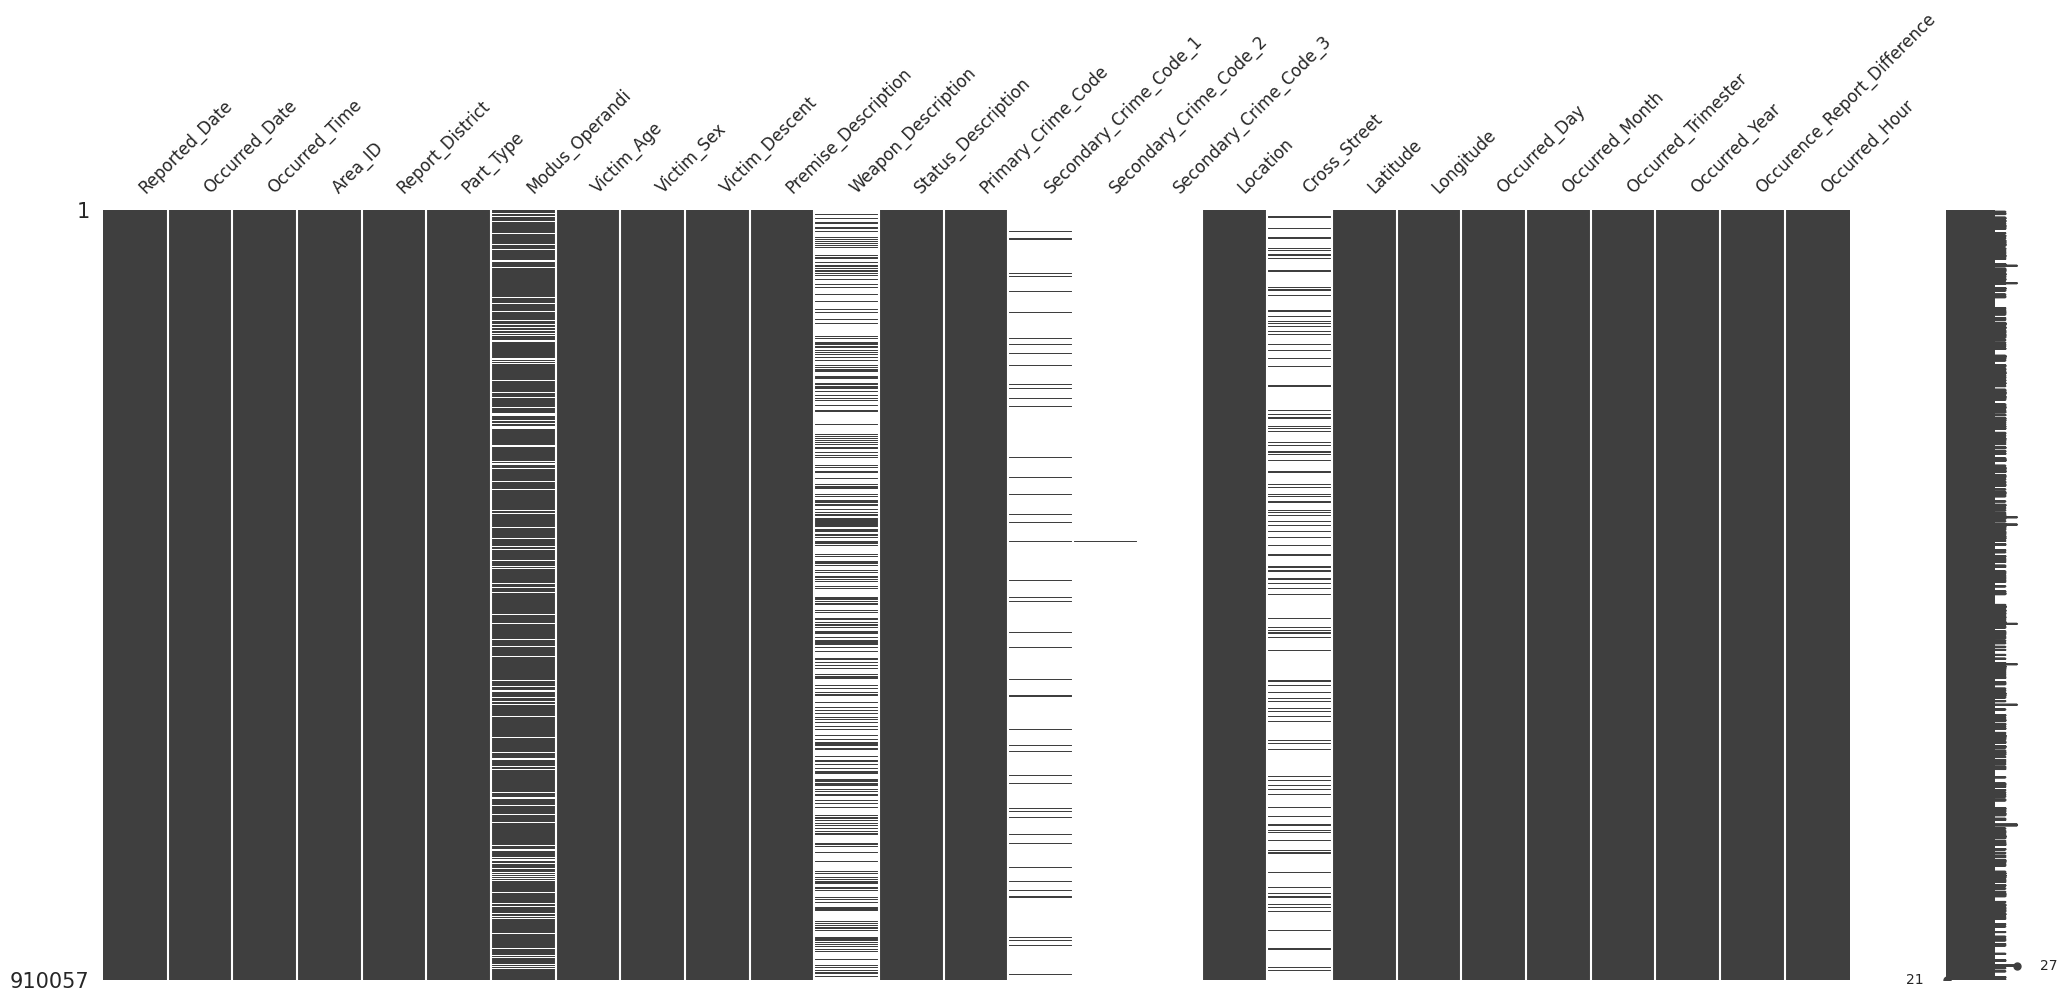

In [117]:
missingno.matrix(data,fontsize=12)
plt.plot()

<h2>Data analysis using Visualisations</h2>

<h3>Top 10 Crimes overall</h3>

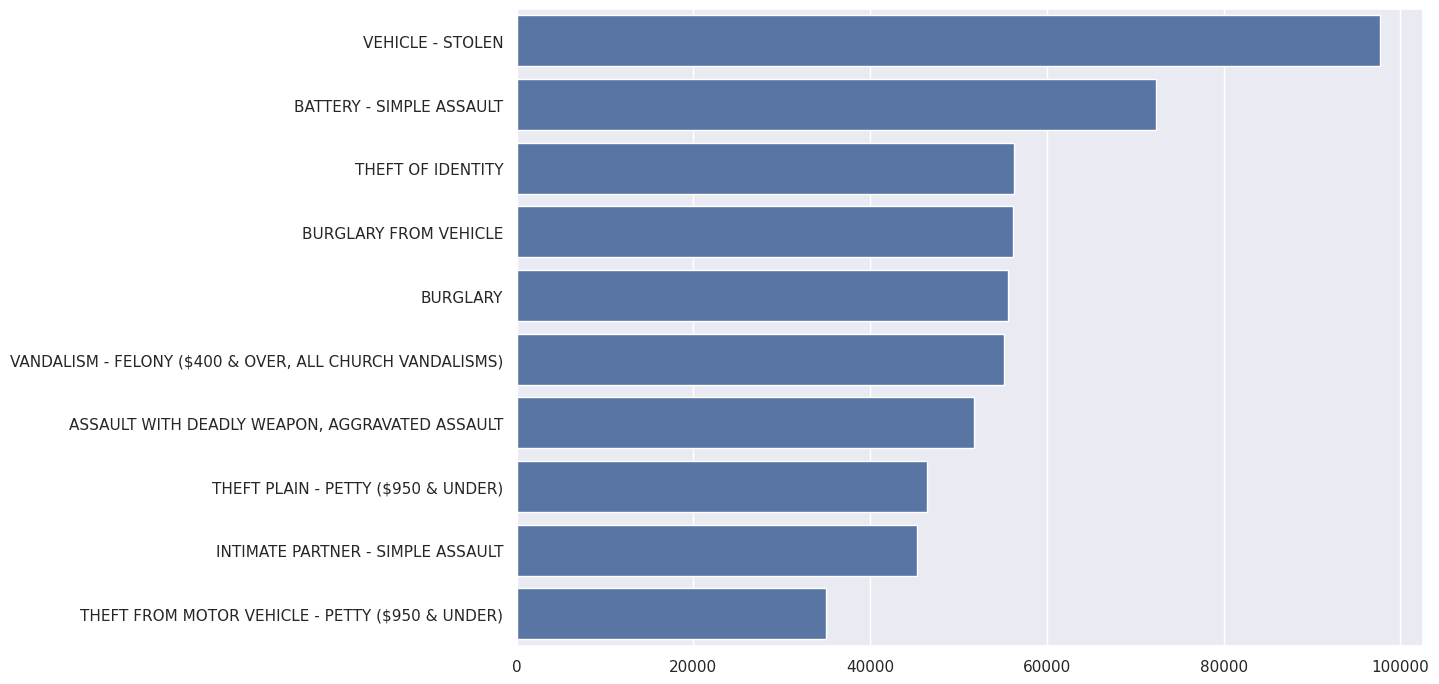

In [118]:
df = data["Primary_Crime_Code"].value_counts()
df.index = [primary_crime_to_description[crime_code] for crime_code in df.index.tolist()]
plot = sns.barplot(data=df.head(10),orient="h")
plot.set_xlabel("")
plot.set_ylabel("")
pass

<h3>Crimes by month</h3>

<p>We notice a stability without much variation in crime by month.</p>

/tmp/ipykernel_3223/3601613104.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels=df.index,rotation=30)


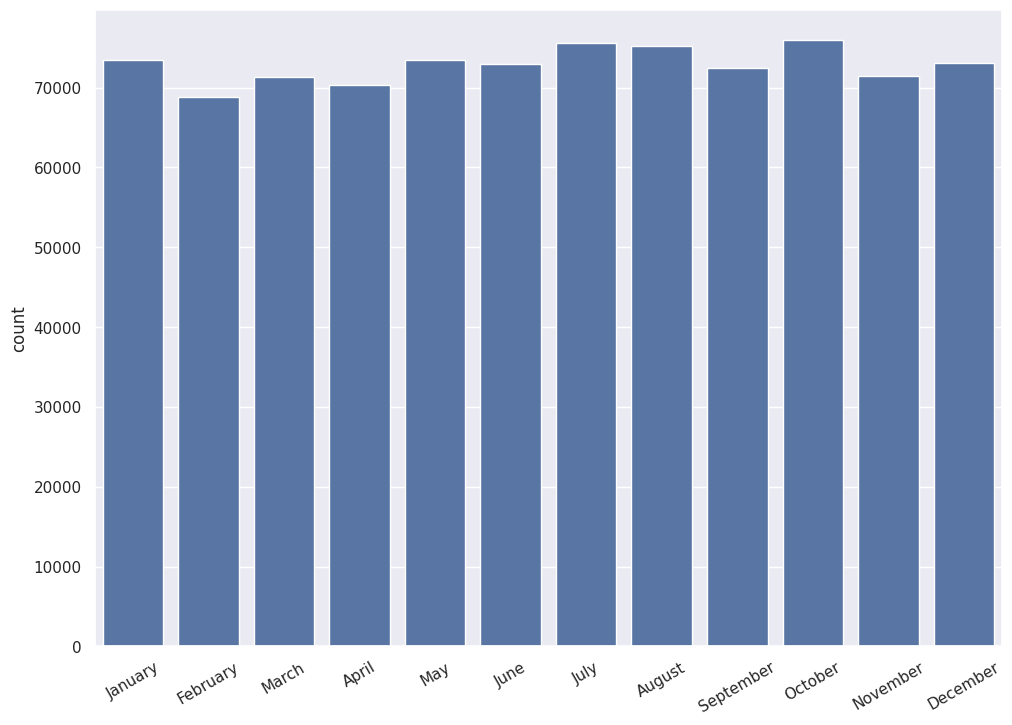

In [119]:
month_order_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df = data[["Occurred_Month"]].loc[data["Occurred_Year"] < 2024].value_counts()
sorted_indexes = sorted(df.index, key=lambda x: month_order_dict[x[0]])
df = df.loc[sorted_indexes]
df.index = [index[0] for index in df.index]
plot = sns.barplot(df)
plot.set_xticklabels(labels=df.index,rotation=30)
pass

In [120]:
df.describe()

count       12.000000
mean     72831.666667
std       2157.603103
min      68776.000000
25%      71405.000000
50%      73023.500000
75%      73878.750000
max      75986.000000
Name: count, dtype: float64

<h3>Crimes by month 2020-2023</h3>

<p>We observe an apparent increase from the year 2020 to the year 2023, which could be because of the covid lockdown during 2020.</p>

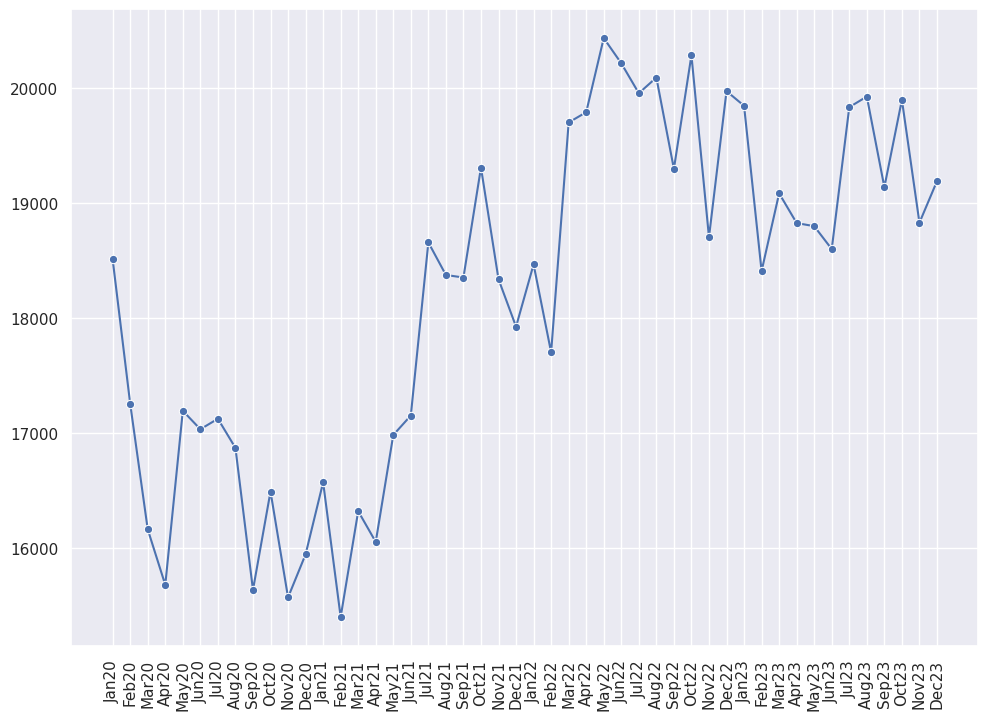

In [121]:
custom_sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = data[["Occurred_Month","Occurred_Year"]].loc[data["Occurred_Year"] < 2024].value_counts()
sorted_indexes = sorted(df.index, key=lambda x: (x[1], {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}[x[0]]))
df = df.loc[sorted_indexes].rename("Count")
sorted_indexes = [x[0][:3]+str(x[1])[-2:] for x in sorted_indexes]
df.index = sorted_indexes
plot = sns.lineplot(df,marker="o")
plot.tick_params(axis="x",rotation=90)
plot.set_xlabel("")
plot.set_ylabel("")
pass

<h4>Crimes by Trimestre</h4>

<p>We remove the year 2024 since the data would bias the plot as we have data of only the first trimester.</p>
<p>It seems that there are more crimes being committed in the third trimester, but not by much.</p>

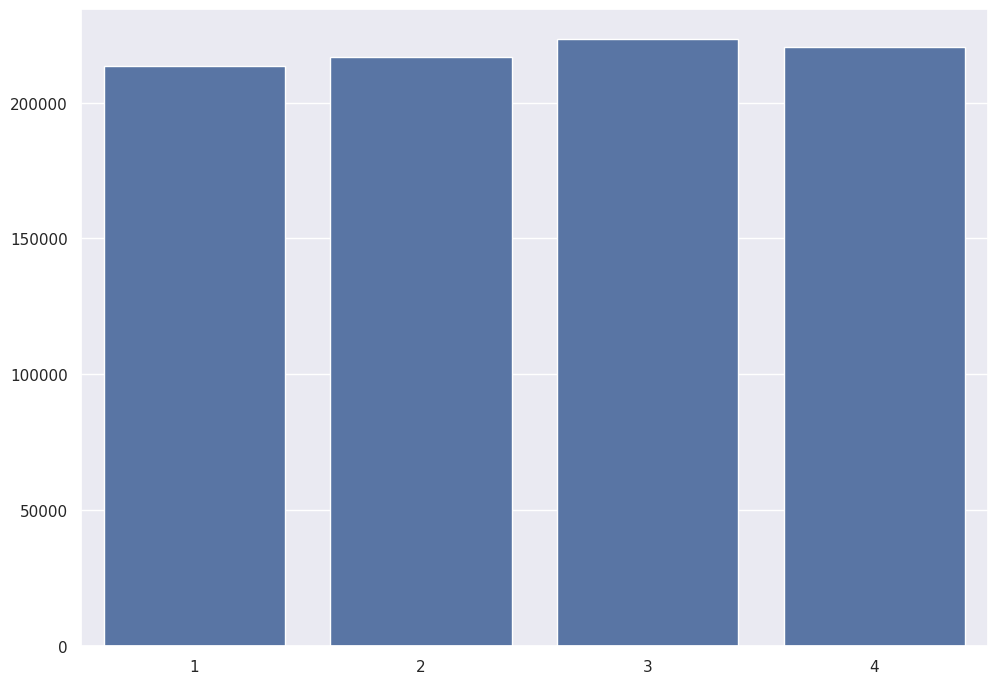

In [122]:
df = data["Occurred_Trimester"].loc[data["Occurred_Year"] != 2024].value_counts()
plot = sns.barplot(data=df)
plot.set_xlabel("")
plot.set_ylabel("")
pass

<h4>Crimes by Year</h4>
<p>Year 2024 is incomplete, which explains the lack of crime in the data.</p>
<p>2022 is the year with the most crimes reported.</p>

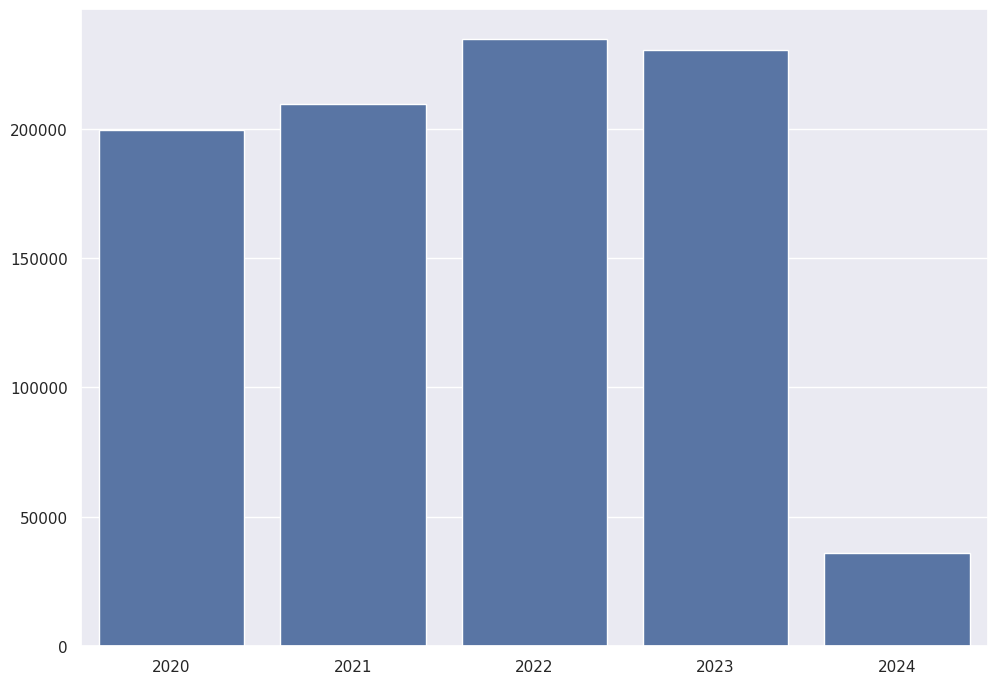

In [123]:
df = data["Occurred_Year"].value_counts()
plot = sns.barplot(data=df)
plot.set_xlabel("")
plot.set_ylabel("")
pass

<h3>Crimes by hour of the day</h3>
<p>We observe a peak of crime at noon, and an increase in crime from 14:00 (2PM) untill 18:00 (6PM).</p>

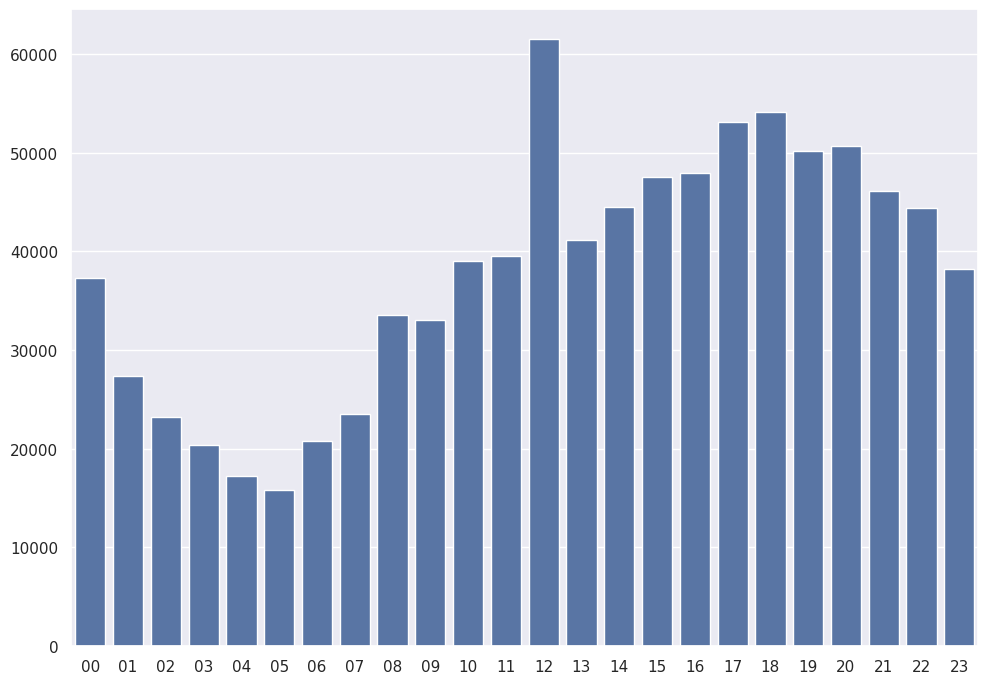

In [124]:
df = data["Occurred_Hour"].value_counts().sort_index()
plot = sns.barplot(data=df)
plot.set_xlabel("")
plot.set_ylabel("")
pass

<h3>Overall Crime By Victim Sex</h3>
<p>It seems that men are more likely to be victims of overall crime than women.</p>

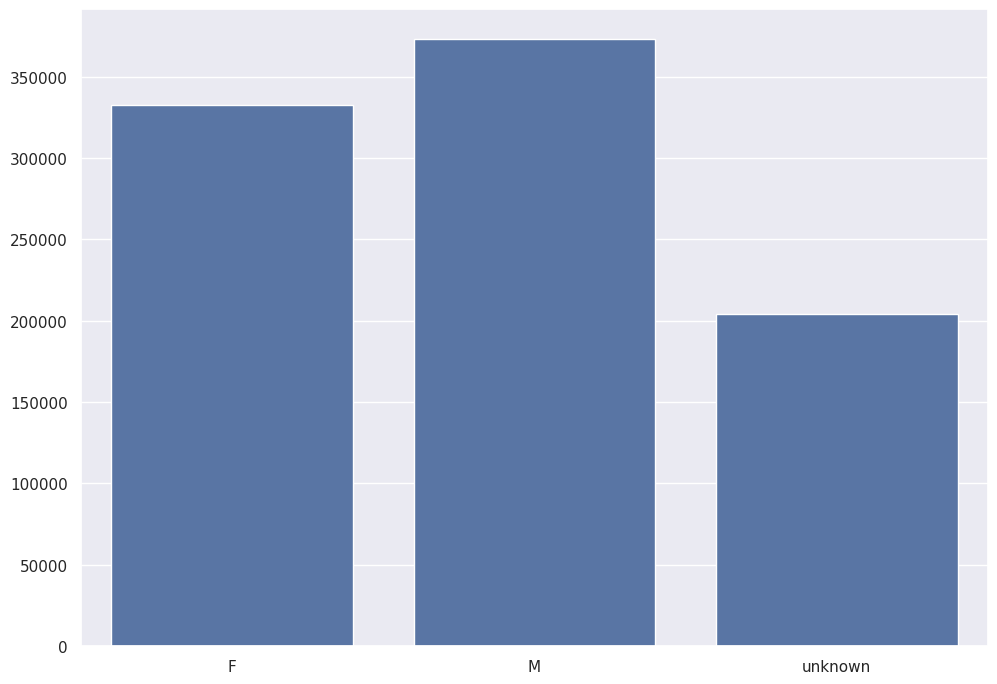

In [125]:
df = data["Victim_Sex"].value_counts().sort_index()
df.index = [ x if x != "X" else "unknown" for x in df.index.tolist()]
plot = sns.barplot(data=df)
plot.set_xlabel("")
plot.set_ylabel("")
pass

<h3>Top 10 crimes for women</h3>

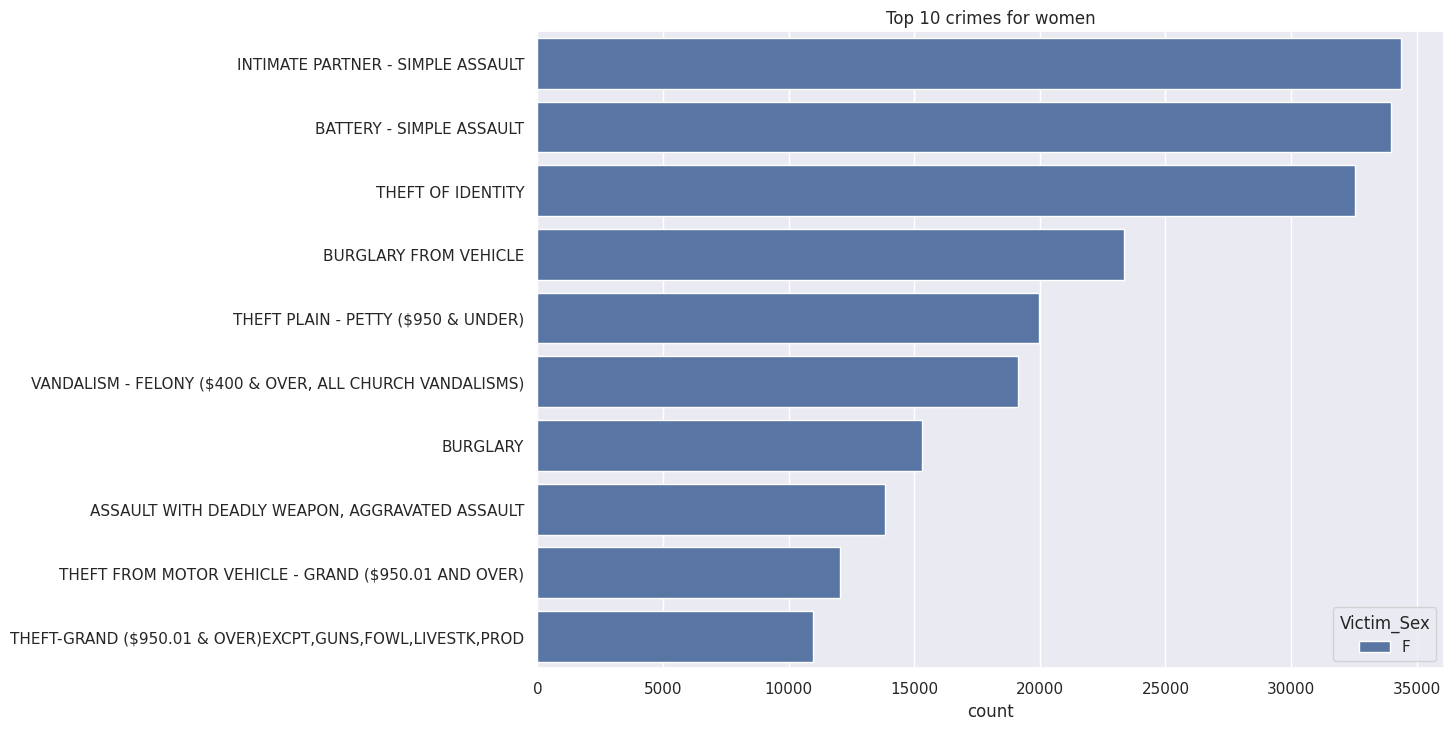

In [126]:
df = data[["Victim_Sex","Primary_Crime_Code"]].loc[data["Victim_Sex"] != "X"].value_counts().sort_values(ascending=False)
df = df.reset_index()
df["Primary_Crime_Code"] = df["Primary_Crime_Code"].map(primary_crime_to_description)
women_df = df.loc[df["Victim_Sex"] == "F"]
plot = sns.barplot(women_df.head(10), y="Primary_Crime_Code", x="count", hue="Victim_Sex", orient="h" )
plot.set_title("Top 10 crimes for women")
plot.set_ylabel("")
pass

<h3>Top 10 crimes for men</h3>

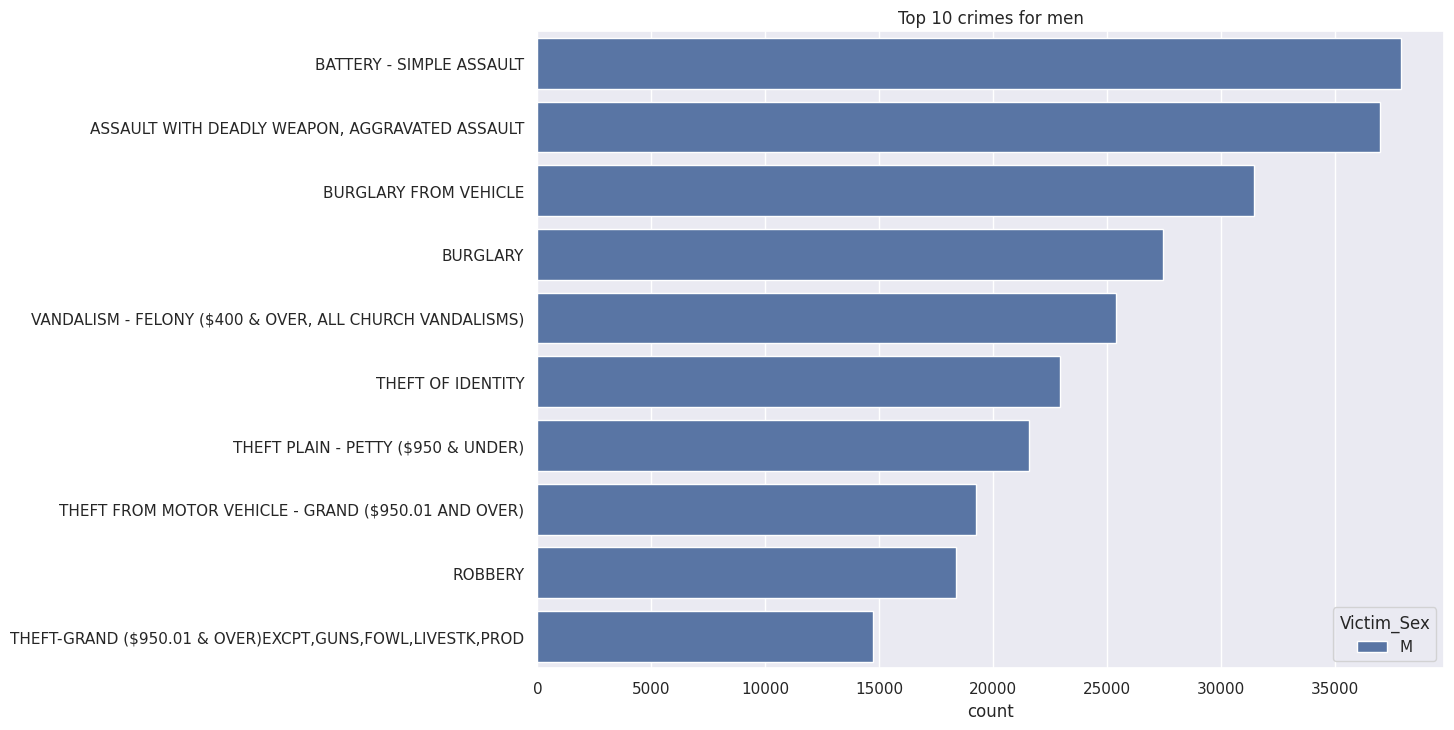

In [127]:
df = data[["Victim_Sex","Primary_Crime_Code"]].loc[data["Victim_Sex"] != "X"].value_counts().sort_values(ascending=False)
df = df.reset_index()
df["Primary_Crime_Code"] = df["Primary_Crime_Code"].map(primary_crime_to_description)
men_df = df.loc[df["Victim_Sex"] == "M"]
plot = sns.barplot(men_df.head(10), y="Primary_Crime_Code", x="count", hue="Victim_Sex", orient="h")
plot.set_title("Top 10 crimes for men")
plot.set_ylabel("")
pass

<h3>Top 10 crimes where men are affected more than women by Difference</h3>

<p>We notice below that men are significantly more likely to be assaulted, robbed or be victims of burglary.</p>

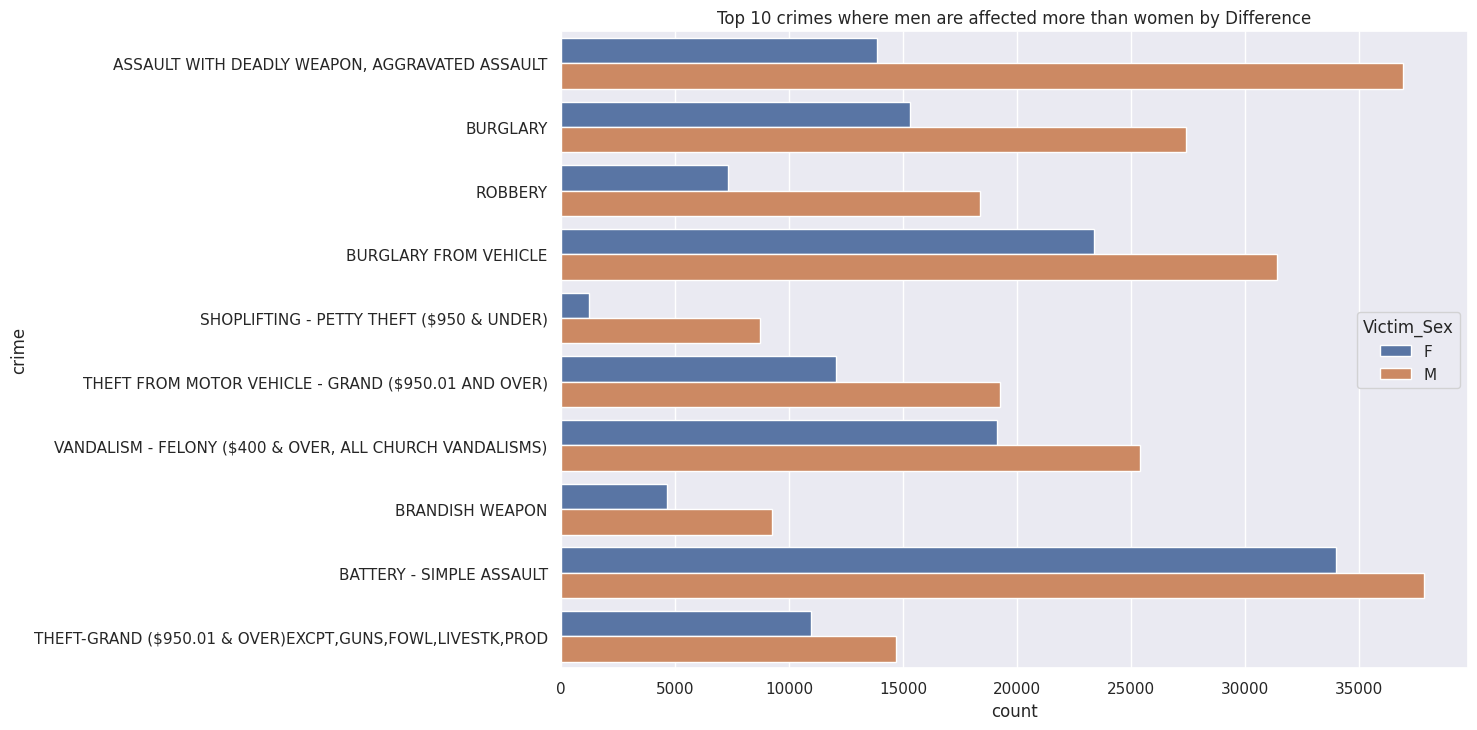

In [134]:
df = data[["Victim_Sex","Primary_Crime_Code"]].loc[data["Victim_Sex"] != "X"].value_counts().sort_values(ascending=False)
df = df.reset_index()
df["Primary_Crime_Code"] = df["Primary_Crime_Code"].map(primary_crime_to_description)
df.fillna({"count":0},inplace=True)
men_df = df.loc[df["Victim_Sex"] == "M"].drop("Victim_Sex",axis=1).rename({"count":"M"},axis=1)
women_df = df.loc[df["Victim_Sex"] == "F"].drop("Victim_Sex",axis=1).rename({"count":"F"},axis=1)
joined_df = men_df.set_index("Primary_Crime_Code").join(women_df.set_index("Primary_Crime_Code")).reset_index()
joined_df["Difference"] = joined_df.apply(lambda row : (row["M"]-row["F"]),axis=1)
joined_df = joined_df.dropna().sort_values(by="Difference",ascending=False)
plot_df = pd.melt(joined_df,id_vars=['Primary_Crime_Code','Difference'],value_vars=['F','M'],var_name="Victim_Sex").sort_values(by=["Difference"],ascending=False)
plot = sns.barplot(plot_df.head(20),hue="Victim_Sex",y="Primary_Crime_Code",x="value",orient="h")
plot.set_title("Top 10 crimes where men are affected more than women by Difference")
plot.set_ylabel("crime")
plot.set_xlabel("count")
pass

<h3>Top 10 crimes where women are affected more than men by Difference</h3>
<p>We notice below that women are more likely to be assaulted by their partners, raped, be victims of stolen identity or restraining order violation and are more likely to be victims of sexual crimes in general.</p>

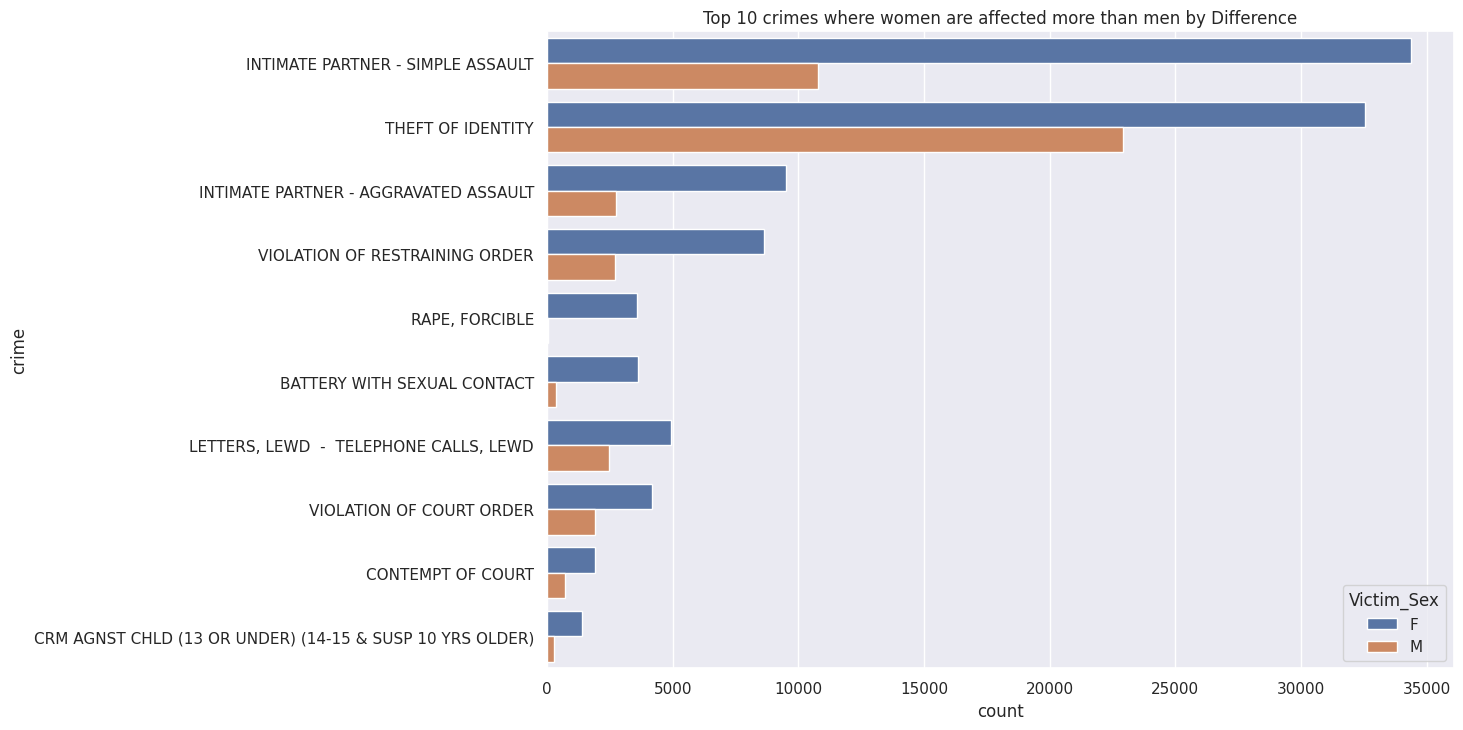

In [135]:
df = data[["Victim_Sex","Primary_Crime_Code"]].loc[data["Victim_Sex"] != "X"].value_counts().sort_values(ascending=False)
df = df.reset_index()
df["Primary_Crime_Code"] = df["Primary_Crime_Code"].map(primary_crime_to_description)
men_df = df.loc[df["Victim_Sex"] == "M"].drop("Victim_Sex",axis=1).rename({"count":"M"},axis=1)
women_df = df.loc[df["Victim_Sex"] == "F"].drop("Victim_Sex",axis=1).rename({"count":"F"},axis=1)
joined_df = men_df.set_index("Primary_Crime_Code").join(women_df.set_index("Primary_Crime_Code")).reset_index()
joined_df["Difference"] = joined_df.apply(lambda row : (row["M"]-row["F"]),axis=1)
joined_df = joined_df.dropna().sort_values(by="Difference",ascending=True)
plot_df = pd.melt(joined_df,id_vars=['Primary_Crime_Code','Difference'],value_vars=['F','M'],var_name="Victim_Sex").sort_values(by=["Difference"],ascending=True)
plot = sns.barplot(plot_df.head(20),hue="Victim_Sex",y="Primary_Crime_Code",x="value",orient="h")
plot.set_title("Top 10 crimes where women are affected more than men by Difference")
plot.set_ylabel("crime")
plot.set_xlabel("count")
pass

<h3>Crime variation per age and sex</h3>

<p>Men and women have the same age distribution.</p>

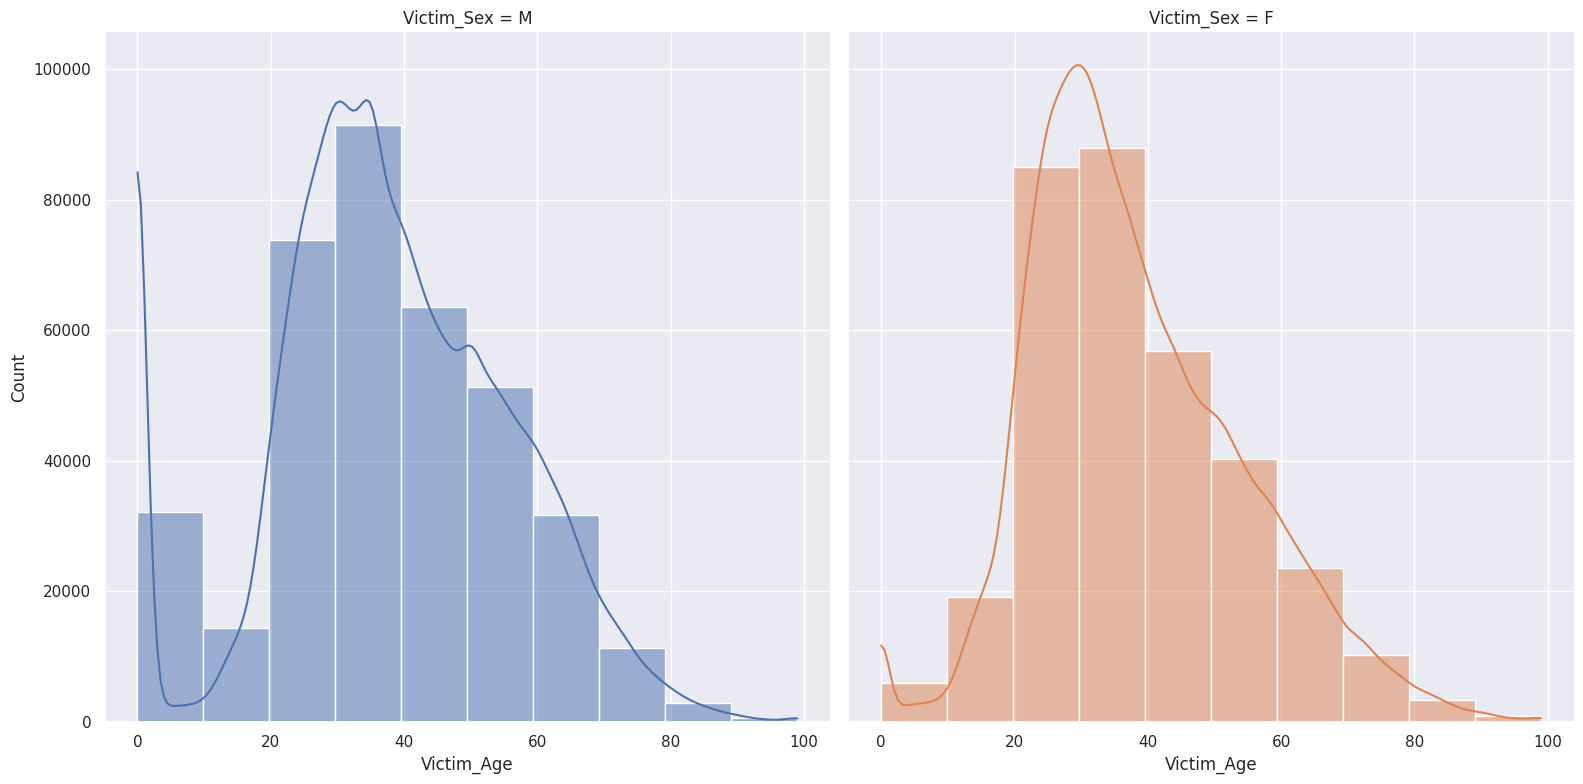

In [130]:
df = data[["Victim_Sex","Victim_Age"]].loc[data["Victim_Sex"] != "X"]
sea = sns.FacetGrid(df, col="Victim_Sex",height=8,hue="Victim_Sex")   
sea.map(sns.histplot,"Victim_Age",bins=10,kde=True)
pass

<p>Most of the unknown values have 0 as their main victim age probably due to the fact that it's the default value for unknown victims.</p>

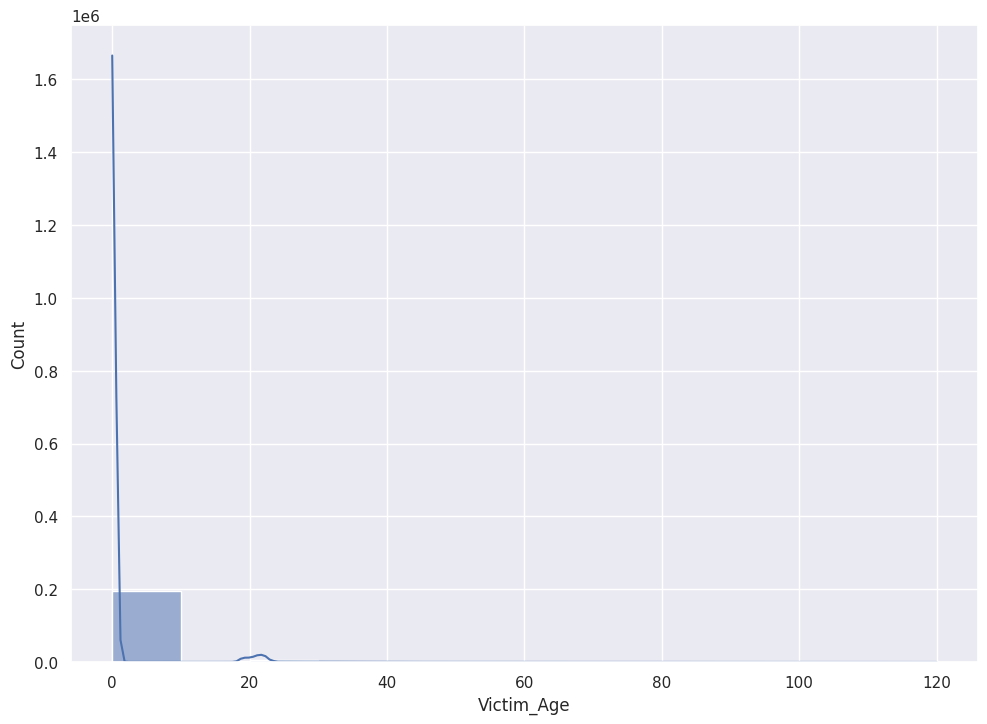

In [131]:
df = data[["Victim_Sex","Victim_Age"]].loc[data["Victim_Sex"] == "X"]
plot = sns.histplot(df,x="Victim_Age",bins=12,kde=True)
pass

<h3>Top Premises for crime</h3>

<p>The street is the highest premise for crime, followed by single family homes.</p>

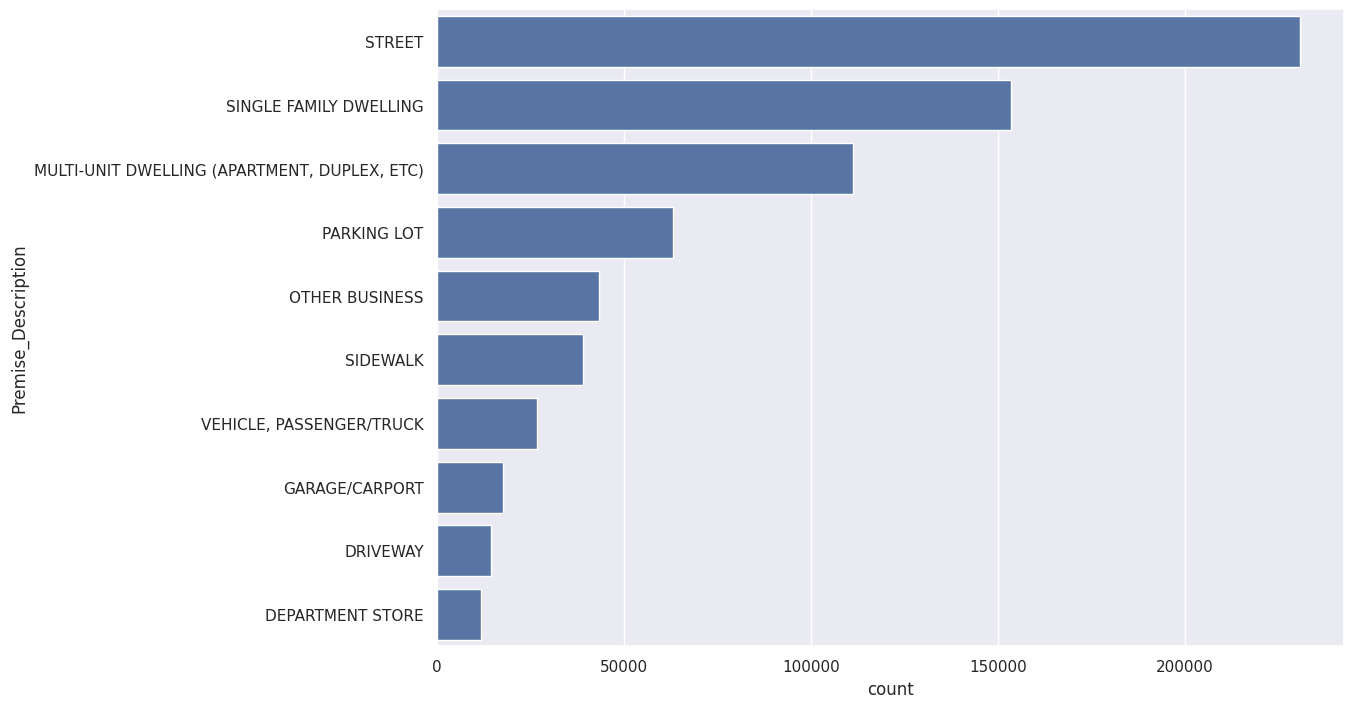

In [132]:
df = data["Premise_Description"].value_counts().sort_values(ascending=False)
plot = sns.barplot(df.head(10),orient="h")
pass

<h3>Top Crimes by premise</h3>
<p>We notice below the difference in crimes per premise, in the street you are most likely to have your vehicle stolen, in single family homes identity theft is more frequent.</p>

/home/ayoub/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


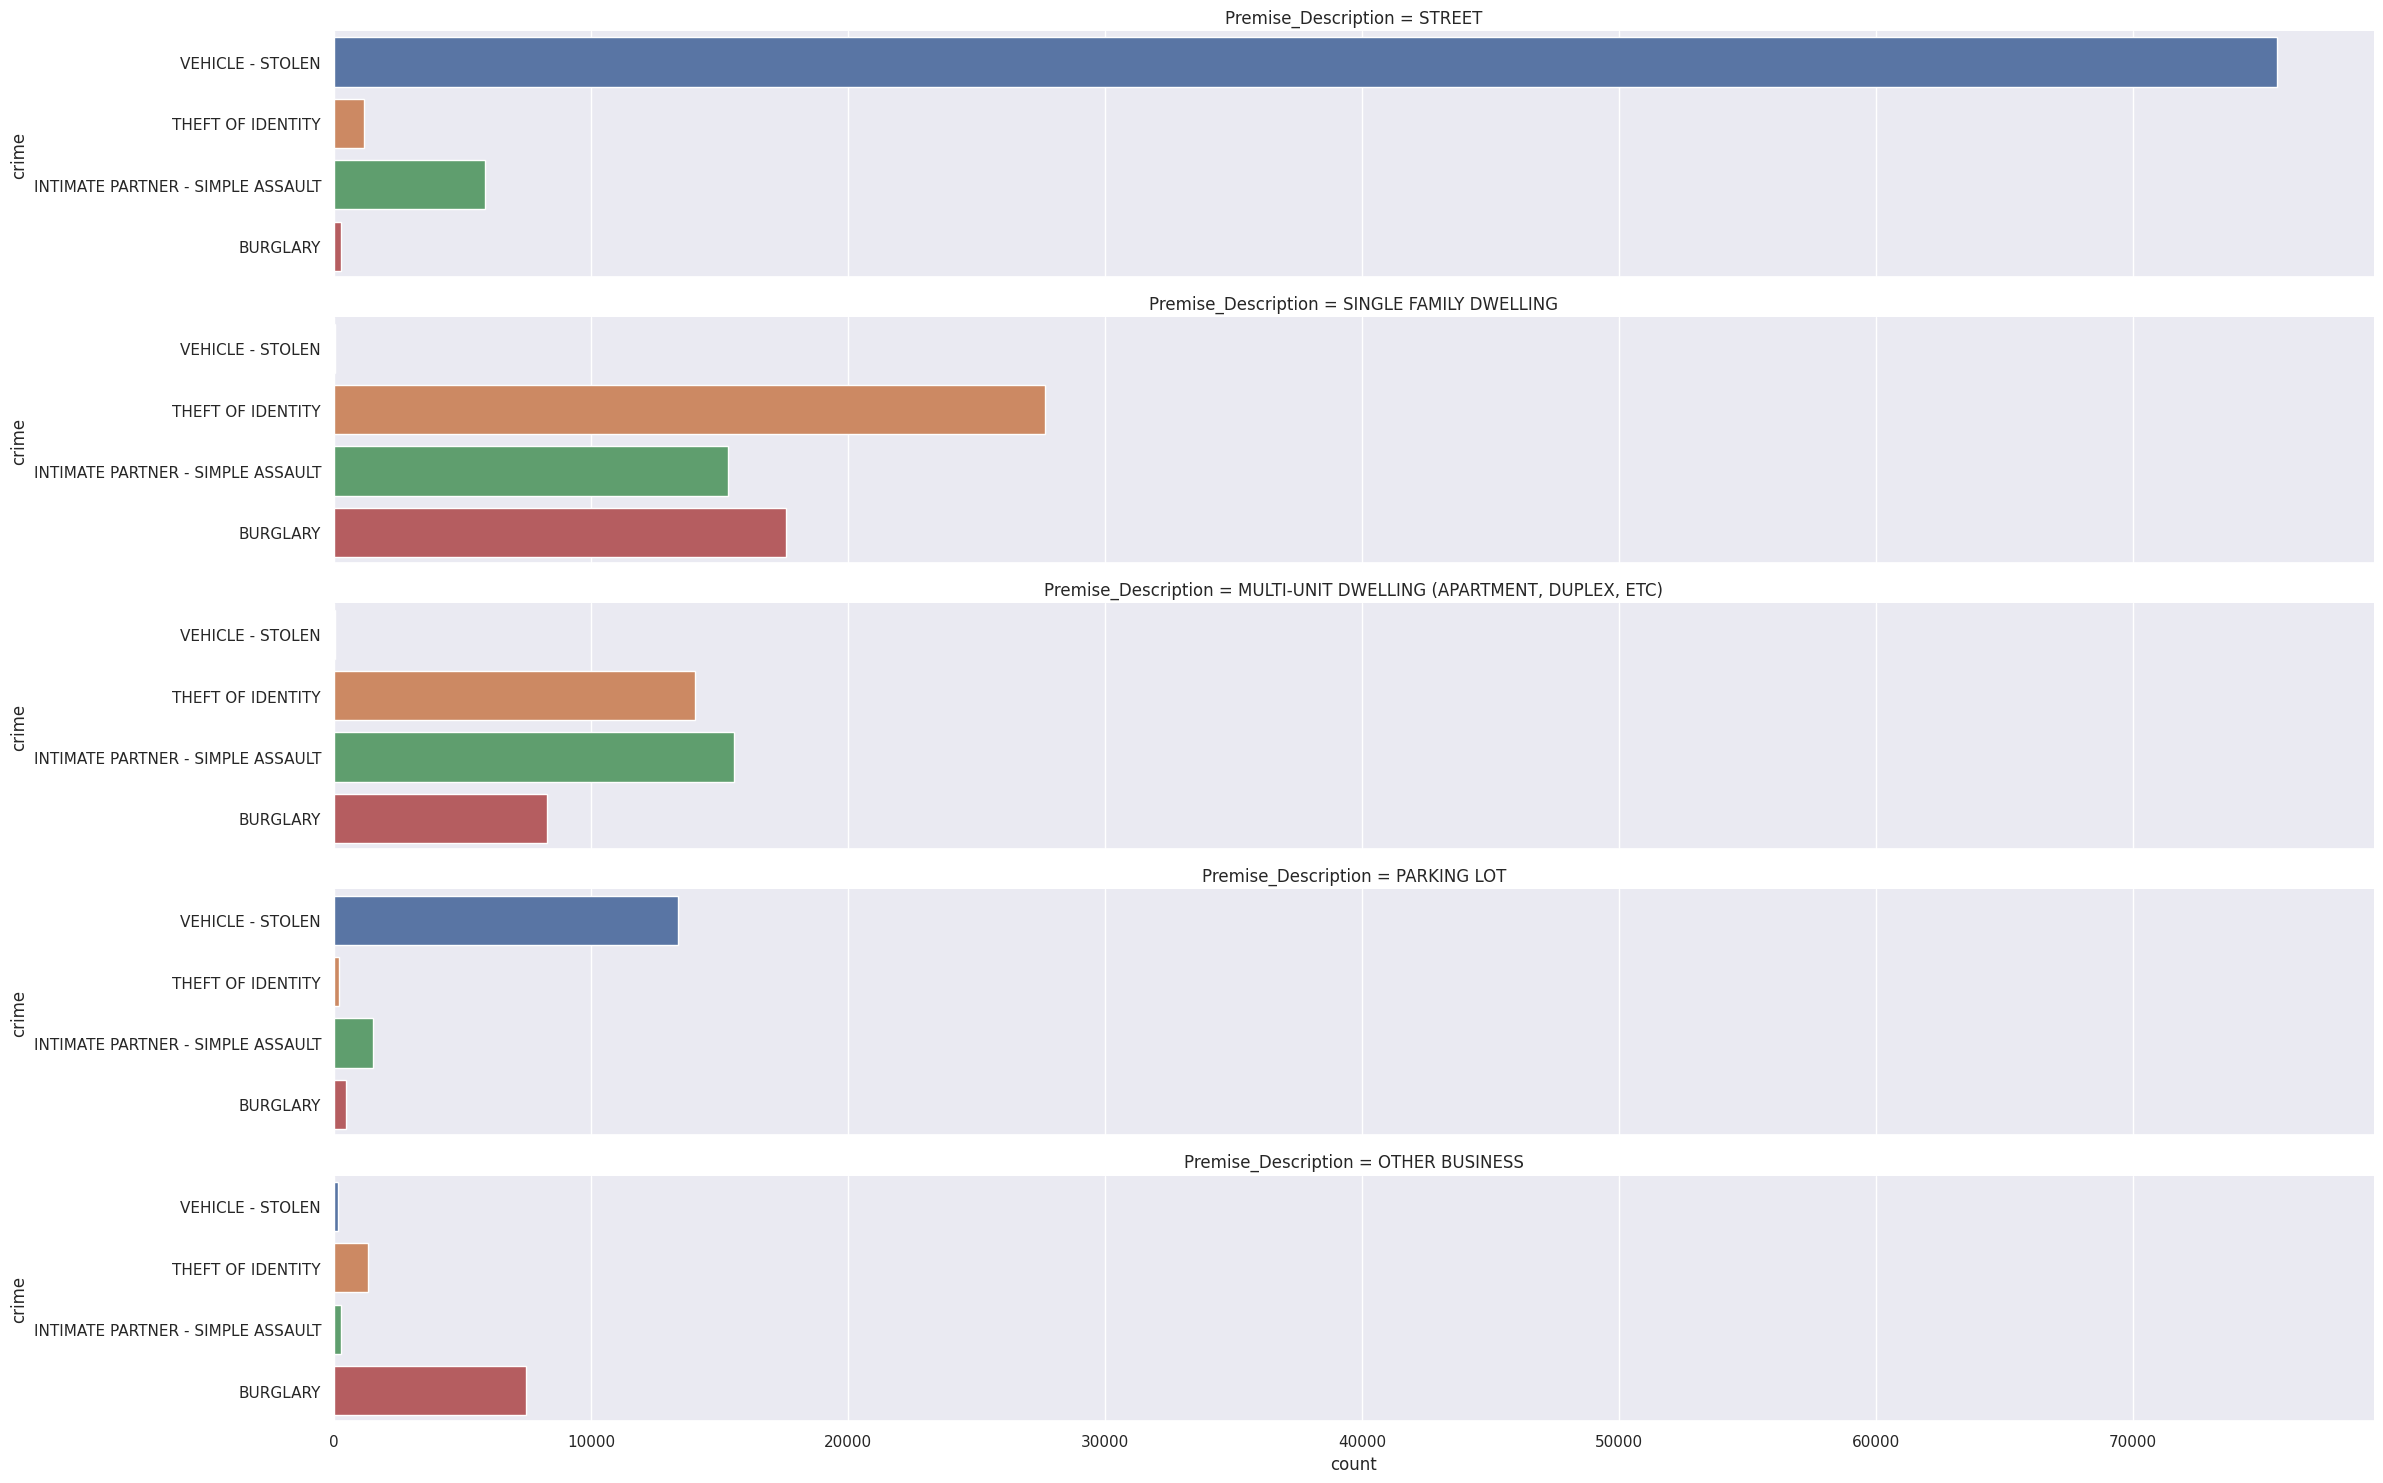

In [136]:
premises = 5
top_crimes_per_premise = 1
premise_to_crime = {}
df  = data[["Primary_Crime_Code","Premise_Description"]].value_counts().sort_values(ascending=False)
top_premises = data["Premise_Description"].value_counts()
top_premises = top_premises.head(premises).index.tolist()
for crime in top_premises:
    premise_to_crime[crime] = []
for index in df.index.tolist():
    if index[1] in top_premises:
        premise_to_crime[index[1]].append(index[0])
indexes = []
for y in premise_to_crime.values():
    indexes.extend([(crime,x) for x in premise_to_crime.keys() for crime in y[:top_crimes_per_premise]])
df = df.loc[indexes].reset_index()
df["Primary_Crime_Code"] = df["Primary_Crime_Code"].map(primary_crime_to_description)
sea = sns.FacetGrid(df, row = "Premise_Description",aspect=8,hue="Primary_Crime_Code")   
sea.map(sns.barplot,  "count","Primary_Crime_Code",orient="h")
sea.set_ylabels("crime")
pass